In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
df=pd.read_csv('cleaningtrainingdata.csv')

In [0]:
X=df[['PrevAVGCost','PrevAssignedCost','AVGCost','LatestDateCost','A','B','C','D','E','F','G']]
y=df['GenPrice']

#Data pre-processing

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=888)

In [6]:
print (X_train.shape, y_train.shape)

(19700, 11) (19700,)


#Train

In [0]:
from sklearn.neural_network import MLPRegressor

In [8]:
mlp =MLPRegressor (hidden_layer_sizes=(11,11,11), activation='relu', solver='adam', max_iter=500,learning_rate = 'adaptive')
mlp.fit(X_train,y_train)




MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(11, 11, 11), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [9]:
train=pd.concat([X_train,y_train],axis='columns')
train.head()


,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
1388,37.797297,32.0,41.108108,39.405405,1,0,0,0,0,0,0,55.0
23997,12.121212,66.0,10.101010,10.101010,1,0,0,0,0,0,0,95.0
19402,0.000000,49.0,0.000000,0.000000,0,1,0,0,0,0,0,70.0
16365,31.565657,32.0,33.131313,31.242424,1,0,0,0,0,0,0,46.0
8684,48.265306,80.0,73.200000,73.810526,1,0,0,0,0,0,0,117.0


In [10]:
print("Train set accuracy = " + str(mlp.score(X_train, y_train)))
print("Test set accuracy = " + str(mlp.score(X_test, y_test)))

Train set accuracy = 0.9877965955312668
Test set accuracy = 0.9865772719237296


#Predict

In [0]:
pred = mlp.predict(X_test)


In [12]:
test=pd.concat([X_test,y_test],axis='columns')
test.head(10)

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
2191,1.606061,2.000000,1.898990,1.262626,0,0,0,0,1,0,0,3.0
6931,54.656566,72.000000,54.656566,54.656566,1,0,0,0,0,0,0,79.0
14279,33.648936,35.000000,20.840426,21.574468,1,0,0,0,0,0,0,38.0
14618,0.000000,0.000000,24.555556,25.424242,1,0,0,0,0,0,0,37.0
15260,12.580645,13.000000,11.849462,10.451613,1,0,0,0,0,0,0,22.0
8095,0.000000,86.000000,0.000000,0.000000,0,0,1,0,0,0,0,136.0
22371,52.787879,54.000000,36.151515,27.676768,1,0,0,0,0,0,0,59.0
10980,0.000000,200.000000,212.373737,0.000000,0,0,0,0,0,0,1,275.0
9997,38.282828,48.919192,39.767677,39.666667,0,0,0,0,0,0,1,65.0
23062,38.202020,60.000000,90.909091,90.909091,0,1,0,0,0,0,0,100.0


In [13]:
dt=pd.concat([test.reset_index(),pd.Series(pred,name='predicted')],axis='columns').round(2)
dt.head(10)

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,predicted
0,2191,1.61,2.00,1.90,1.26,0,0,0,0,1,0,0,3.0,3.04
1,6931,54.66,72.00,54.66,54.66,1,0,0,0,0,0,0,79.0,93.27
2,14279,33.65,35.00,20.84,21.57,1,0,0,0,0,0,0,38.0,39.56
3,14618,0.00,0.00,24.56,25.42,1,0,0,0,0,0,0,37.0,33.73
4,15260,12.58,13.00,11.85,10.45,1,0,0,0,0,0,0,22.0,17.53
5,8095,0.00,86.00,0.00,0.00,0,0,1,0,0,0,0,136.0,124.78
6,22371,52.79,54.00,36.15,27.68,1,0,0,0,0,0,0,59.0,60.64
7,10980,0.00,200.00,212.37,0.00,0,0,0,0,0,0,1,275.0,279.93
8,9997,38.28,48.92,39.77,39.67,0,0,0,0,0,0,1,65.0,68.66
9,23062,38.20,60.00,90.91,90.91,0,1,0,0,0,0,0,100.0,117.87


#MSE

In [14]:
print('MSE:',mean_squared_error(y_test, pred))

MSE: 154.60882225170894


#MAPE

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
print('MAPE:', mean_absolute_percentage_error(y_test, pred))

MAPE: 6.941865692864685


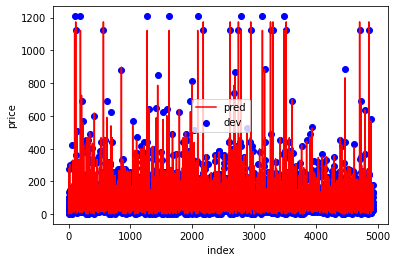

In [17]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(pred))], pred, color='r')
#plt.scatter([i for i in range(len(pred))],sorted(pred),color='r')
plt.scatter([i for i in range(len(pred))],y_test,color='b')
plt.ylabel('price')
plt.xlabel('index')
plt.legend(['pred', 'dev'], loc='best')
plt.show()

#dump(save) &load model with joblib

In [18]:
from sklearn.externals import joblib
joblib.dump(mlp,'Genprice.joblib')

['Genprice.joblib']

In [0]:
fn=joblib.load('Genprice.joblib')

#Predict Test1

In [0]:
ts1=pd.read_csv('cleaningtestdata1.csv')
tx=ts1[['PrevAVGCost','PrevAssignedCost','AVGCost','LatestDateCost','A','B','C','D','E','F','G']]

In [0]:
prediction=fn.predict(tx)

In [0]:
ts1['GenPrice']=prediction

In [0]:
test1=ts1[['SKU','date','GenPrice']]

In [24]:
test1

,SKU,date,GenPrice
0,A-A-00001,1/20/2020,42.335635
1,A-B-00001,1/20/2020,76.169886
2,A-B-00002,1/20/2020,54.727191
3,A-C-00001,1/20/2020,110.806611
4,A-C-00019,1/20/2020,110.806611
...,...,...,...
495,A-E-00170,1/20/2020,4.985516
496,A-E-00171,1/20/2020,4.985516
497,A-D-00149,1/20/2020,4.985516
498,A-B-00040,1/20/2020,4.985516


In [0]:
test1.to_csv('testdata1_neural.csv')

#Predic test2

In [0]:
ts2=pd.read_csv('cleaningtestdata2.csv')
test2=ts2[['PrevAVGCost','PrevAssignedCost','AVGCost','LatestDateCost','A','B','C','D','E','F','G']]

In [0]:
predic=fn.predict(test2)

In [0]:
ts2['GenPrice']=predic

In [0]:
test_2=ts2[['SKU','date','GenPrice']]

In [30]:
test_2

,SKU,date,GenPrice
0,A-A-00001,2020-03-27,29.703474
1,A-B-00001,2020-03-27,64.741014
2,A-B-00002,2020-03-27,60.112407
3,A-C-00001,2020-03-27,119.256257
4,A-C-00019,2020-03-27,119.256257
...,...,...,...
506,A-B-00040,2020-03-27,4.985516
507,A-I-00090,2020-03-27,4.985516
508,A-E-00190,2020-03-27,4.985516
509,A-E-00011,2020-03-27,4.985516


In [0]:
test_2.to_csv('testdata2_neural.csv')